# Mall Customer Segmentation

**Inroduction about the dataset**
* CustomerID - unique for each customer
* Gender - Binary attribute for male and female
* AnnualIncome - in $ (dollar)
* Spending score - ranging from 1 to 100

**Importing relevant libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


**Loading data**

In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Exploratory data Analysis**

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#checking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

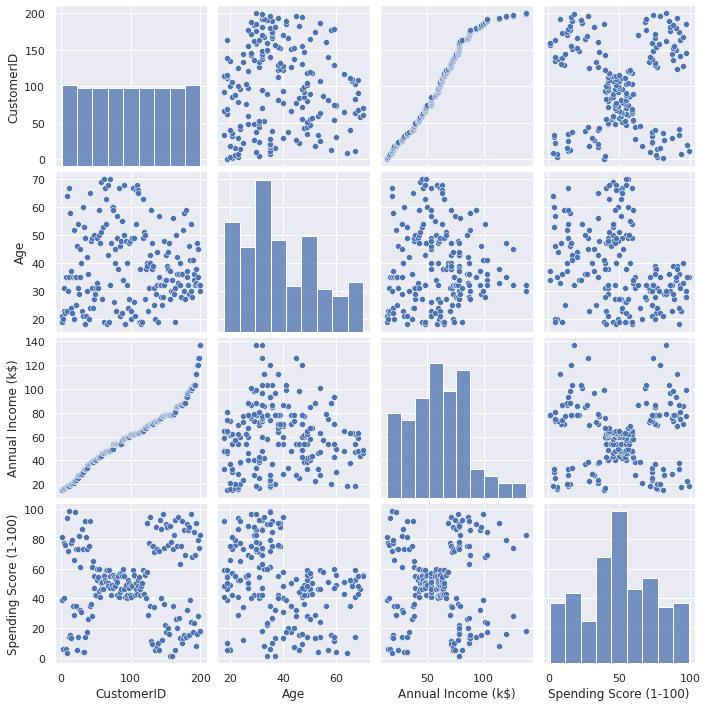

In [7]:
sns.pairplot(data)

**As we can depict annual income and  spending score can be used for clustering customers**

<AxesSubplot:title={'center':'Distibution of Gender'}, xlabel='Gender', ylabel='count'>

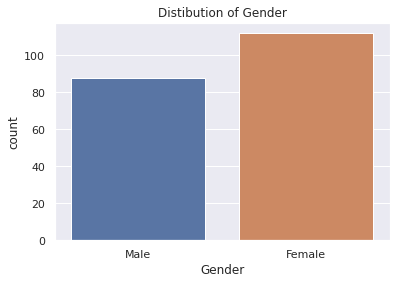

In [8]:
plt.title('Distibution of Gender')
sns.countplot(data.Gender)

<AxesSubplot:title={'center':'Average spending score'}, xlabel='Gender', ylabel='Spending Score (1-100)'>

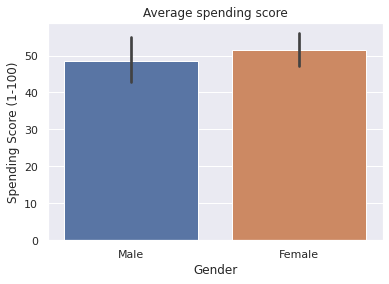

In [9]:
plt.title('Average spending score')
sns.barplot(x = 'Gender', y = 'Spending Score (1-100)', data = data)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

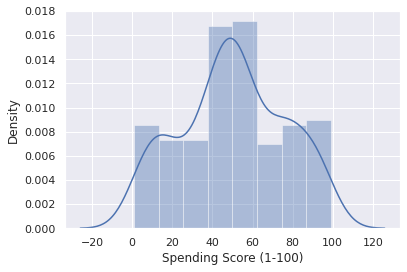

In [10]:
sns.distplot(data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

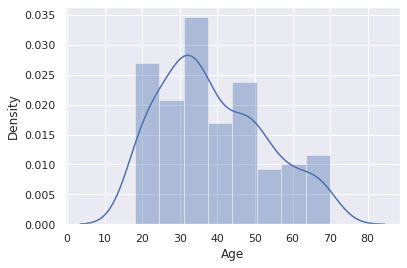

In [11]:
sns.distplot(data['Age'])

**Encoding 'Gender' column**

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data.Gender = le.fit_transform(data.Gender)

# KMeans Clustering for segmentation

In [13]:
from sklearn.cluster import KMeans

**Using WCSS (Within-cluster sum of squares) for determining number of clusters**

In [14]:
# using ANNUAL INCOME and SPENDING SCORE for clustering
X = data.iloc[:,[3,4]].values

wcss = []
for i in range(1,15):
    kmeans = KMeans(i, random_state = 0, max_iter = 250)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within Cluster sum of squares')

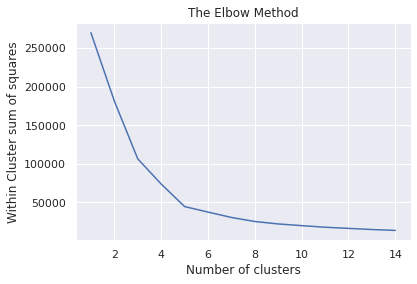

In [15]:
number_of_clusters = range(1,15)
plt.plot(number_of_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of squares')

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300,random_state = 0)

y_kmeans = kmeans.fit_predict(X)
#y_kmeans

In [17]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

# Visualizing clusters

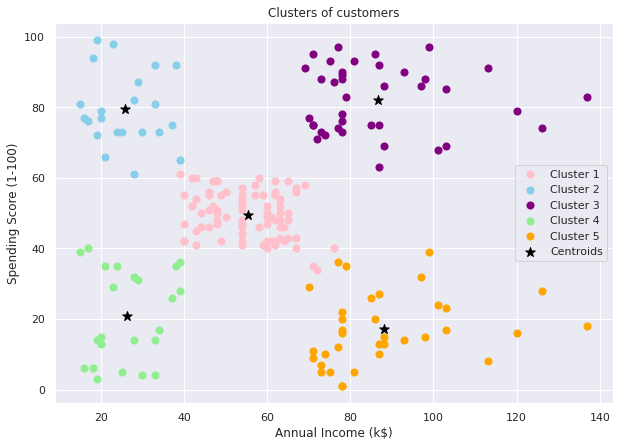

In [18]:
plt.figure(figsize = (10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'pink', label = 'Cluster 1', s = 50)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'skyblue', label = 'Cluster 2', s = 50)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'purple', label = 'Cluster 3', s = 50)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'lightgreen', label = 'Cluster 4', s = 50)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'orange', label = 'Cluster 5', s = 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids', marker = '*')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()